In [1]:
import numpy as np
import numpy.linalg as la

### Costruzione matrice con una riga "quasi" combinazione lineare delle altre due

In [2]:
A = np.array([[ 2,  -1,  3],
              [ 3,  -2,  2],
              [17, -10, 19]])
A

array([[  2,  -1,   3],
       [  3,  -2,   2],
       [ 17, -10,  19]])

In [3]:
ls, V = la.eig(A)
ind = np.argsort(np.abs(ls))[::-1]
ls = ls[ind]
V = V[:,ind]
print('Autovalori:',ls)
print('Matrice autovettori:\n',V)

Autovalori: [ 20.55447189  -1.5851635    0.03069161]
Matrice autovettori:
 [[-0.15304185  0.30324453 -0.62143392]
 [-0.10746621 -0.73440809 -0.7686358 ]
 [-0.982359   -0.60719644  0.15171974]]


#### RImozione autovalore minimo

In [4]:
ls1=ls[[0,1]]
ls1

array([ 20.55447189,  -1.5851635 ])

#### Rimozione autovettore (colonna) relativo all'autovalore minimo

In [5]:
V1=V[:,[0,1]]
V1

array([[-0.15304185,  0.30324453],
       [-0.10746621, -0.73440809],
       [-0.982359  , -0.60719644]])

#### Calcolo inversa della matrice degli autovettori

In [6]:
V_1=la.inv(V)
V_1

array([[-0.79177261,  0.45375652, -0.9442466 ],
       [ 1.05642477, -0.86785452, -0.0696407 ],
       [-0.89868062, -0.53523933,  0.19855866]])

#### RImozione autovettore (riga) della matrice inversa relativo all'autovalore minimo

In [7]:
V_11 = V_1[[0,1]]
V_11

array([[-0.79177261,  0.45375652, -0.9442466 ],
       [ 1.05642477, -0.86785452, -0.0696407 ]])

#### Matrice degli autovalori

In [8]:
L = np.diag(ls)
L

array([[ 20.55447189,   0.        ,   0.        ],
       [  0.        ,  -1.5851635 ,   0.        ],
       [  0.        ,   0.        ,   0.03069161]])

#### Matrice degli autovalori senza l'autovalore minimo

In [9]:
L1 = np.diag(ls1)
L1

array([[ 20.55447189,   0.        ],
       [  0.        ,  -1.5851635 ]])

#### Ricostruzione matrice A parendo dalle matrici di autovettori e autovalori ridotte

In [10]:
V1.dot(L1.dot(V_11))

array([[  1.98285964,  -1.01020852,   3.00378707],
       [  2.97879952,  -2.01262665,   2.00468413],
       [ 17.00418473,  -9.99750765,  18.99907541]])

#### Si noti che la matrice ricostruita è "quasi" uguale alla matrice originale A

In [11]:
A

array([[  2,  -1,   3],
       [  3,  -2,   2],
       [ 17, -10,  19]])

### Calcolo dei numeri di Fibonacci con gli autovettori

In [12]:
def fibo(n):
    sqr5 = np.sqrt(5)
    a = np.power(((1+sqr5)/2),n+1)
    b = np.power(((1-sqr5)/2),n+1)
    return int((a-b)/sqr5)

In [13]:
for k in range(20):
    print(fibo(k))

1
1
2
3
5
8
13
21
34
55
89
144
233
377
610
987
1597
2584
4181
6765


### Funziona con un'immagine quadrata?

In [14]:
from scipy.ndimage import imread
import matplotlib.pyplot as plt

In [15]:
%matplotlib inline

In [16]:
img = imread('lion-licking-paw.png', mode='L')

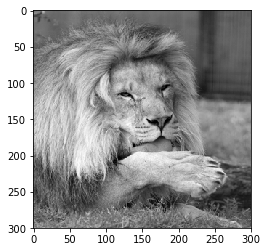

In [17]:
imgplot = plt.imshow(img,cmap='gray')

In [18]:
ls, V = la.eig(img)
ind = np.argsort(np.abs(ls))[::-1]
ls = ls[ind]
V = V[:,ind]

In [19]:
ls

array([  3.53465290e+04 +0.00000000e+00j,
         3.74227704e+03 +0.00000000e+00j,
        -1.01903784e+03 +1.79122101e+03j,
        -1.01903784e+03 -1.79122101e+03j,
         1.14590105e+03 +4.93218534e+02j,
         1.14590105e+03 -4.93218534e+02j,
         5.60582556e+00 +1.08269660e+03j,
         5.60582556e+00 -1.08269660e+03j,
        -9.46879649e+02 +0.00000000e+00j,
        -5.16380271e+02 +6.53186800e+02j,
        -5.16380271e+02 -6.53186800e+02j,
         7.78031498e+02 +0.00000000e+00j,
         2.91806583e+02 +6.84871725e+02j,
         2.91806583e+02 -6.84871725e+02j,
        -4.27742833e+02 +4.25685598e+02j,
        -4.27742833e+02 -4.25685598e+02j,
         4.82295689e+02 -1.69740659e+02j,
         4.82295689e+02 +1.69740659e+02j,
        -4.57008805e+02 +0.00000000e+00j,
         3.40181965e+02 +2.64648686e+02j,
         3.40181965e+02 -2.64648686e+02j,
         1.42277240e+02 +3.76452202e+02j,
         1.42277240e+02 -3.76452202e+02j,
        -2.24435619e+02 +3.0584698

In [20]:
def reduce_img(V,ls,n):
    ind = np.argsort(np.abs(ls))[::-1]
    ls = ls[ind]
    V = V[:,ind]
    if np.imag(np.sum(ls[:n])) > 1.e-5:
        n += 1
    L = np.diag(ls)
    V_1 = la.inv(V)
    Lr = L[:n,:n]
    Vr = V[:,:n]
    V_1r = V_1[:n,:]
    imgr = np.real(Vr.dot(Lr.dot(V_1r)))
    return imgr, 100*np.sum(np.abs(ls[:n]))/np.sum(np.abs(ls))

Informazione conservata: 99.01%
% Autovalori rimossi: 16.67%


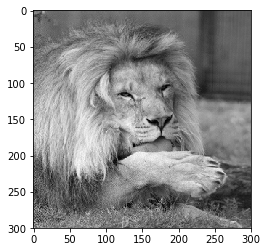

In [21]:
n = 250
imgr, red = reduce_img(V,ls,n)
plt.imshow(imgr,cmap='gray')
print('Informazione conservata: {:.2f}%'.format(red))
print('% Autovalori rimossi: {:.2f}%'.format(100*(1-n/len(ls))))

Informazione conservata: 96.60%
% Autovalori rimossi: 33.33%


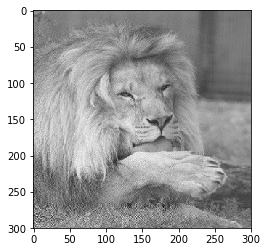

In [22]:
n = 200
imgr, red = reduce_img(V,ls,n)
plt.imshow(imgr,cmap='gray')
print('Informazione conservata: {:.2f}%'.format(red))
print('% Autovalori rimossi: {:.2f}%'.format(100*(1-n/len(ls))))

Informazione conservata: 92.65%
% Autovalori rimossi: 50.00%


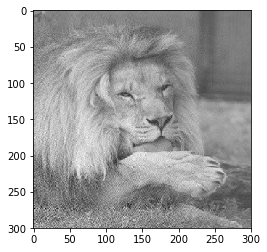

In [23]:
n = 150
imgr, red = reduce_img(V,ls,n)
plt.imshow(imgr,cmap='gray')
print('Informazione conservata: {:.2f}%'.format(red))
print('% Autovalori rimossi: {:.2f}%'.format(100*(1-n/len(ls))))

Informazione conservata: 86.77%
% Autovalori rimossi: 66.67%


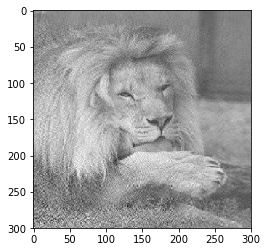

In [24]:
n = 100
imgr, red = reduce_img(V,ls,n)
plt.imshow(imgr,cmap='gray')
print('Informazione conservata: {:.2f}%'.format(red))
print('% Autovalori rimossi: {:.2f}%'.format(100*(1-n/len(ls))))

Informazione conservata: 77.27%
% Autovalori rimossi: 83.33%


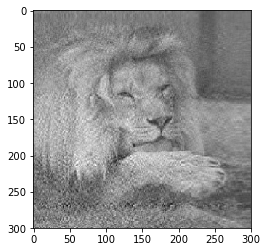

In [25]:
n = 50
imgr, red = reduce_img(V,ls,n)
plt.imshow(imgr,cmap='gray')
print('Informazione conservata: {:.2f}%'.format(red))
print('% Autovalori rimossi: {:.2f}%'.format(100*(1-n/len(ls))))

Informazione conservata: 70.90%
% Autovalori rimossi: 90.00%


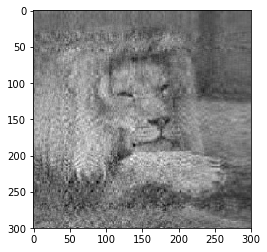

In [26]:
n = 30
imgr, red = reduce_img(V,ls,n)
plt.imshow(imgr,cmap='gray')
print('Informazione conservata: {:.2f}%'.format(red))
print('% Autovalori rimossi: {:.2f}%'.format(100*(1-n/len(ls))))

Informazione conservata: 60.07%
% Autovalori rimossi: 96.67%


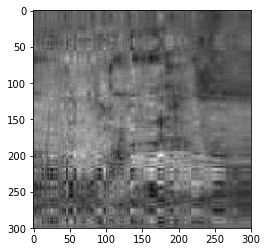

In [27]:
n = 10
imgr, red = reduce_img(V,ls,n)
plt.imshow(imgr,cmap='gray')
print('Informazione conservata: {:.2f}%'.format(red))
print('% Autovalori rimossi: {:.2f}%'.format(100*(1-n/len(ls))))

Informazione conservata: 54.39%
% Autovalori rimossi: 98.33%


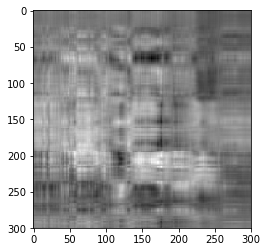

In [28]:
n = 5
imgr, red = reduce_img(V,ls,n)
plt.imshow(imgr,cmap='gray')
print('Informazione conservata: {:.2f}%'.format(red))
print('% Autovalori rimossi: {:.2f}%'.format(100*(1-n/len(ls))))

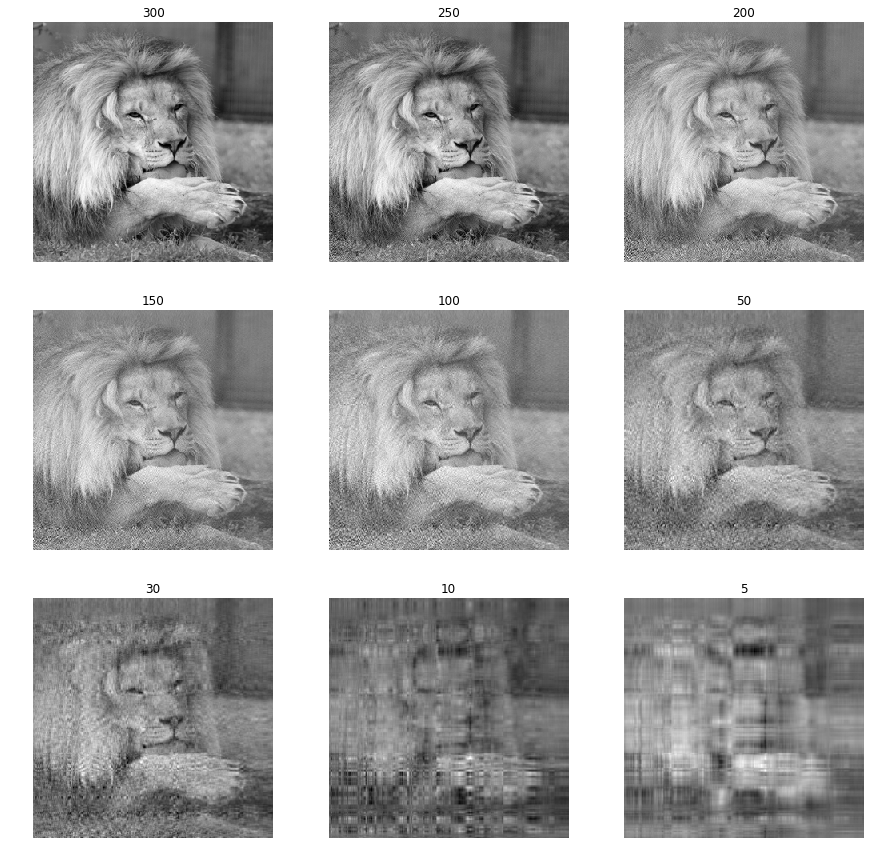

In [29]:
plt.subplots(3, 3,figsize=(15,15))
n = [300,250,200,150,100,50,30,10,5]
for k in range(len(n)):
    rp = int(k/3)
    cp = k%3
    plt.subplot(3,3,k+1)
    imgr, red = reduce_img(V,ls,n[k])
    plt.axis('off')
    plt.title(n[k])
    plt.imshow(imgr,cmap='gray')
    

#### Grafico dell'informazione conservata vs. # di autovalori

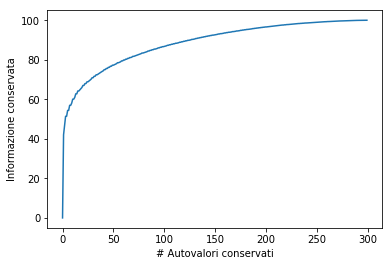

In [30]:
inf = []
for n in range(300):
    imgr, red = reduce_img(V,ls,n)
    inf.append(red)
plt.xlabel('# Autovalori conservati')
plt.ylabel('Informazione conservata')
plt.plot(range(300),inf)

## Autovalori multipli

#### Molteplicità algebrica (ma non geometrica)

In [ ]:
A = np.array([[0,1,1],
              [1,0,1],
              [1,1,0]])

In [ ]:
ls, V = la.eig(A)
ind = np.argsort(np.abs(ls))[::-1]
ls = ls[ind]
V = V[:,ind]

In [ ]:
ls

In [ ]:
V

In [ ]:
la.inv(V)

#### Molteplicità algebrica e geometrica

In [ ]:
A = np.array([[1,1],
              [0,1]])

In [ ]:
ls, V = la.eig(A)
ind = np.argsort(np.abs(ls))[::-1]
ls = ls[ind]
V = V[:,ind]

In [ ]:
ls

In [ ]:
V

In [ ]:
la.inv(V)

## Matrici simmetriche

#### Matrice A simmetrica

In [ ]:
A = np.array([[ 1, 3,-2],
              [ 3,-2,-1],
              [-2,-1, 2]])
A

#### Calcolo autovalori e autovettori

In [ ]:
ls, V = la.eig(A)
ind = np.argsort(np.abs(ls))[::-1]
ls = ls[ind]
V = V[:,ind]

In [ ]:
ls

In [ ]:
V

#### Matrice inversa degli autovettori

In [ ]:
V_1 = la.inv(V)
V_1

#### Matrice trasposta degli autovettori: è identica alla precedente!

In [ ]:
VT = np.transpose(V)
VT

#### Gli autovettori sono tutti ortonormali fra loro

In [ ]:
VT.dot(V)

#### Se modifico la matrice A in modo che non sia più simmetrica (A[1,0]=5)...

In [ ]:
A = np.array([[ 1, 3,-2],
              [ -5,-2,-1],
              [-2,-1, 2]])
ls, V = la.eig(A)
ind = np.argsort(np.abs(ls))[::-1]
ls = ls[ind]
V = V[:,ind]
ls

#### ...gli autovalori non sono più tutti necessariamente reali

#### Se costruisco una matrice simmetrica dal prodotto di A (non simmetrica) e della sua trasposta

In [ ]:
B = A.dot(np.transpose(A))

#### Calcolo degli autovalori e degli autovettori di B

In [ ]:
ls, V = la.eig(B)
ind = np.argsort(np.abs(ls))[::-1]
ls = ls[ind]
V = V[:,ind]

#### Gli autovalori sono tutti reali positivi

In [ ]:
ls